In [12]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap

In [2]:
txt_fdiry = os.path.join(
    "/mount/work/proj_encode_fcc",
    "results_v4",
    "region",
    "KS91_K562_ASTARRseq_peak_macs_input",
    "summary"
)

os.listdir(txt_fdiry)

['peak.summary.enhancer_zscore_junke.ASTARR_AB.tsv',
 'peak.summary.encode_e2g_benchmark.active.tsv',
 'peak.summary.chipseq_histone.tsv',
 'peak.screened.fcc.active.tsv',
 'peak.summary.enhancer_zscore_junke.LMPRA.tsv',
 'peak.summary.encode_e2g_prediction.active.tsv',
 'peak.summary.enhancer_zscore_junke.LMPRA_AB.tsv',
 'peak.summary.enhancer_zscore_junke.ASTARR_A.tsv',
 'peak.summary.hic_intact.deep.overlap.tsv',
 '.ipynb_checkpoints',
 'peak.screened.fcc.inactive.tsv',
 'peak.screened.atac.quantile.tsv',
 'peak.summary.tss_pol2.tsv',
 'peak.summary.enhancer_zscore_junke.STARRMPRA.tsv',
 'peak.summary.enhancer_zscore_junke.TMPRA_R.tsv',
 'peak.summary.encode_e2g_prediction.total.tsv',
 'peak.summary.enhancer_zscore_junke.ASTARR.tsv',
 'peak.summary.enhancer_zscore_junke.TMPRA.tsv',
 'peak.summary.encode_e2g_benchmark.total.tsv',
 'peak.summary.crispri_hcrff.casa.tsv',
 'peak.summary.enhancer_zscore_junke.TMPRA_A.tsv',
 'peak.screened.fcc.total.tsv',
 'peak.screened.fcc.inactive.filt

In [3]:
txt_fdiry = os.path.join(
    "/mount/work/proj_encode_fcc",
    "results_v4",
    "region",
    "KS91_K562_ASTARRseq_peak_macs_input",
    "summary"
)
txt_fname = "peak.summary.chipseq_tf.tsv"
txt_fpath = os.path.join(txt_fdiry, txt_fname)

### read data
dat = pd.read_csv(txt_fpath, sep="\t")

### spread into a count matrix
dat = dat.pivot(index='Peak', columns='Label', values='Count').fillna(0)
dat_chipseq_tf_count = dat

### convert into binary matrix
dat = (dat != 0)
dat = dat.astype(int)
dat_chipseq_tf_binary = dat

In [4]:
dat_chipseq_tf_binary.head()

Label,ADNP_ENCFF739AJO,AFF1_ENCFF195YGC,AFF1_ENCFF674XTY,AGO1_ENCFF794IRP,ARHGAP35_ENCFF952WKN,ARID1B_ENCFF879NTL,ARID2_ENCFF913WRW,ARID3A_ENCFF891OQP,ARID3B_ENCFF270TSN,ARID4B_ENCFF086FAZ,...,ZNF7_ENCFF018HWM,ZNF830_ENCFF150ZBY,ZNF830_ENCFF672NBD,ZNF830_ENCFF896IUI,ZNF83_ENCFF451LLC,ZNF84_ENCFF014HYS,ZSCAN29_ENCFF151WYQ,ZSCAN29_ENCFF407STM,ZSCAN32_ENCFF537HHU,ZZZ3_ENCFF797VEK
Peak,,,,,,,,,,,,,,,,,,,,,
chr10:100009096-100010466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr10:100045961-100046653,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr10:100065094-100065486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr10:100111648-100111979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr10:100129051-100131059,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = dat_chipseq_tf_count.to_numpy()
X.shape

(151753, 733)

In [6]:
#import numpy as np
#from sklearn.decomposition import PCA
#X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.33793383 0.06095241]
[1763.84217901  749.0992209 ]


In [7]:
pca = PCA(n_components=0.9, svd_solver='full')
pca.fit(X)
len(pca.explained_variance_ratio_)

306

In [8]:
Y = pca.transform(X)
print(Y.shape)

dat = pd.DataFrame(Y)
print(dat.shape)
dat.head()

(151753, 306)
(151753, 306)


,0,1,2,3,4,5,6,7,8,9,...,296,297,298,299,300,301,302,303,304,305
0,2.854796,2.284378,-3.838387,-1.899617,-0.428951,1.204939,0.994670,0.387142,-1.305607,-0.791627,...,0.139331,0.016292,0.157757,-0.380105,-0.478860,-0.262381,-0.168076,-0.013819,-0.050502,0.083139
1,-1.857007,0.770359,-2.746917,0.594513,0.558143,0.125688,-0.126846,-0.239053,-0.046100,-0.222204,...,-0.002962,-0.015838,0.005584,-0.002587,-0.018812,0.007109,-0.010351,0.035361,-0.015204,-0.078930
2,-2.156166,0.448383,0.026814,0.269417,-0.033197,-0.196475,-0.069671,-0.117608,-0.135135,0.075610,...,0.105578,-0.097875,-0.029706,-0.030018,0.075543,-0.133255,-0.051999,0.002852,-0.056774,-0.051640
3,-2.207407,0.349159,0.253449,0.337562,-0.043134,-0.269500,-0.122993,-0.037629,-0.051505,0.270972,...,-0.006279,-0.140284,-0.024153,-0.076103,-0.139486,-0.064114,0.012368,-0.062224,-0.051566,0.263054
4,-1.219430,-0.404057,0.585378,-1.138172,-0.378292,-0.486120,0.260733,-0.644035,1.829770,-0.542168,...,0.035332,0.049341,-0.127718,-0.046978,-0.030738,0.097491,-0.013449,-0.012725,-0.082364,0.027057


In [27]:
fit = umap.UMAP(metric='manhattan')
%time U_count = fit.fit_transform(X)

CPU times: user 19min 31s, sys: 1min 46s, total: 21min 17s
Wall time: 2min 21s


In [28]:
#fit = umap.UMAP(metric='manhattan', random_state=123)
#%time U_count = fit.fit_transform(X)

fit = umap.UMAP(n_components = 2)
%time U_pca = fit.fit_transform(Y)

/opt/conda/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


CPU times: user 34min 55s, sys: 14min 36s, total: 49min 32s
Wall time: 5min 5s


In [29]:
print(U_count.shape)
print(U_pca.shape)

(151753, 2)
(151753, 2)


In [32]:
U = U_count

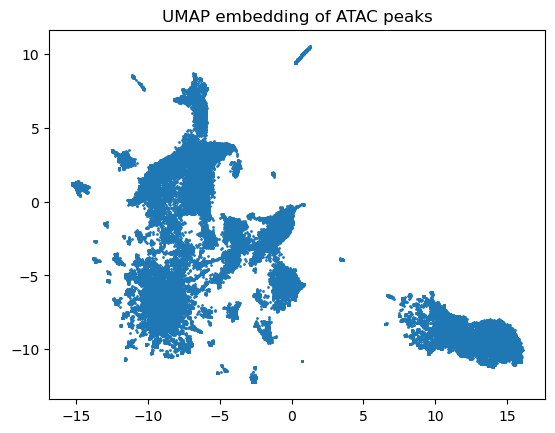

In [84]:
plt.scatter(U[:,0], U[:,1], s=1)
plt.title('UMAP embedding of ATAC peaks');

In [34]:
target = dat_chipseq_tf_count.columns.str.split(pat="_").str[0]
target

Index(['ADNP', 'AFF1', 'AFF1', 'AGO1', 'ARHGAP35', 'ARID1B', 'ARID2', 'ARID3A',
       'ARID3B', 'ARID4B',
       ...
       'ZNF7', 'ZNF830', 'ZNF830', 'ZNF830', 'ZNF83', 'ZNF84', 'ZSCAN29',
       'ZSCAN29', 'ZSCAN32', 'ZZZ3'],
      dtype='object', name='Label', length=733)

In [35]:
idx = np.where(target == "CTCF")[0]
idx

array([88, 89, 90, 91, 92])

In [36]:
dat = dat_chipseq_tf_count
dat.head()

Label,ADNP_ENCFF739AJO,AFF1_ENCFF195YGC,AFF1_ENCFF674XTY,AGO1_ENCFF794IRP,ARHGAP35_ENCFF952WKN,ARID1B_ENCFF879NTL,ARID2_ENCFF913WRW,ARID3A_ENCFF891OQP,ARID3B_ENCFF270TSN,ARID4B_ENCFF086FAZ,...,ZNF7_ENCFF018HWM,ZNF830_ENCFF150ZBY,ZNF830_ENCFF672NBD,ZNF830_ENCFF896IUI,ZNF83_ENCFF451LLC,ZNF84_ENCFF014HYS,ZSCAN29_ENCFF151WYQ,ZSCAN29_ENCFF407STM,ZSCAN32_ENCFF537HHU,ZZZ3_ENCFF797VEK
Peak,,,,,,,,,,,,,,,,,,,,,
chr10:100009096-100010466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr10:100045961-100046653,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr10:100065094-100065486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr10:100111648-100111979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr10:100129051-100131059,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
dat = dat_chipseq_tf_count.iloc[:, idx]
dat.head()

Label,CTCF_ENCFF221SKA,CTCF_ENCFF582SNT,CTCF_ENCFF660GHM,CTCF_ENCFF736NYC,CTCF_ENCFF769AUF
Peak,,,,,
chr10:100009096-100010466,2.0,2.0,2.0,2.0,1.0
chr10:100045961-100046653,1.0,1.0,1.0,1.0,1.0
chr10:100065094-100065486,0.0,0.0,0.0,0.0,0.0
chr10:100111648-100111979,1.0,0.0,0.0,0.0,0.0
chr10:100129051-100131059,0.0,0.0,0.0,0.0,0.0


In [43]:
dat = dat_chipseq_tf_count.iloc[:, idx]
idx = dat.CTCF_ENCFF221SKA > 1
idx.head()

Peak
chr10:100009096-100010466     True
chr10:100045961-100046653    False
chr10:100065094-100065486    False
chr10:100111648-100111979    False
chr10:100129051-100131059    False
Name: CTCF_ENCFF221SKA, dtype: bool

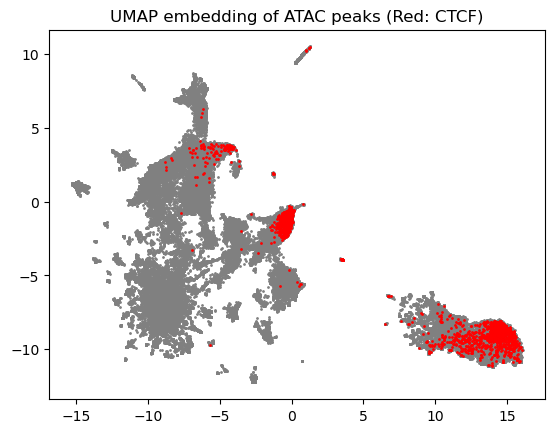

In [46]:
plt.scatter(U[:,  0], U[:,  1], s=1, c="grey")
plt.scatter(U[idx,0], U[idx,1], s=1, c="red")
plt.title('UMAP embedding of ATAC peaks (Red: CTCF)');

In [64]:
idx = np.where(target == "CTCF")[0]
dat = dat_chipseq_tf_count

dat = dat.iloc[:, idx]
dat.head()

Label,CTCF_ENCFF221SKA,CTCF_ENCFF582SNT,CTCF_ENCFF660GHM,CTCF_ENCFF736NYC,CTCF_ENCFF769AUF
Peak,,,,,
chr10:100009096-100010466,2.0,2.0,2.0,2.0,1.0
chr10:100045961-100046653,1.0,1.0,1.0,1.0,1.0
chr10:100065094-100065486,0.0,0.0,0.0,0.0,0.0
chr10:100111648-100111979,1.0,0.0,0.0,0.0,0.0
chr10:100129051-100131059,0.0,0.0,0.0,0.0,0.0


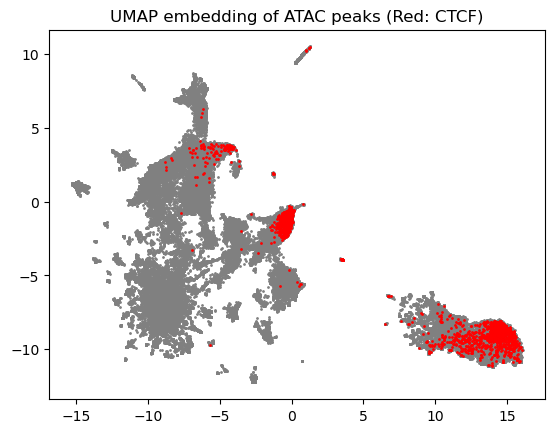

In [62]:
idx = np.where(target == "CTCF")[0]
dat = dat_chipseq_tf_count

dat = dat.iloc[:, idx]
vec = dat.iloc[:, 0]
idx = vec > 1 

plt.scatter(U[:,  0], U[:,  1], s=1, c="grey")
plt.scatter(U[idx,0], U[idx,1], s=1, c="red")
plt.title('UMAP embedding of ATAC peaks (Red: CTCF)');

In [76]:
idx = target.str.contains("POL")
target[idx]

Index(['POLR2A', 'POLR2A', 'POLR2A', 'POLR2A', 'POLR2A', 'POLR2A',
       'POLR2AphosphoS2', 'POLR2AphosphoS2', 'POLR2AphosphoS5', 'POLR2B',
       'POLR2G', 'POLR2H', 'POLR3A', 'POLR3G'],
      dtype='object', name='Label')

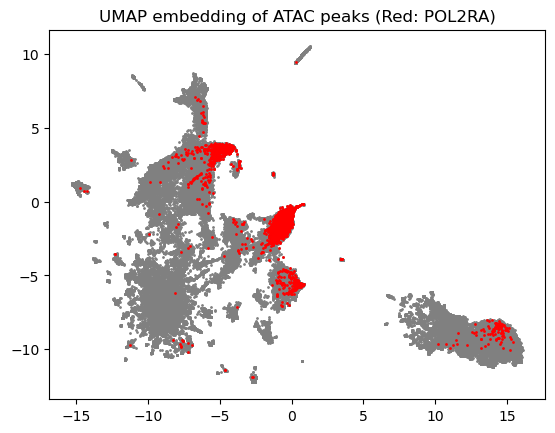

In [79]:
idx = np.where(target == "POLR2A")[0]
dat = dat_chipseq_tf_count

dat = dat.iloc[:, idx]
vec = dat.iloc[:, 0]
idx = vec > 1

plt.scatter(U[:,  0], U[:,  1], s=1, c="grey")
plt.scatter(U[idx,0], U[idx,1], s=1, c="red")
plt.title('UMAP embedding of ATAC peaks (Red: POL2RA)');

In [80]:
idx = target.str.contains("EP300")
target[idx]

Index(['EP300', 'EP300'], dtype='object', name='Label')

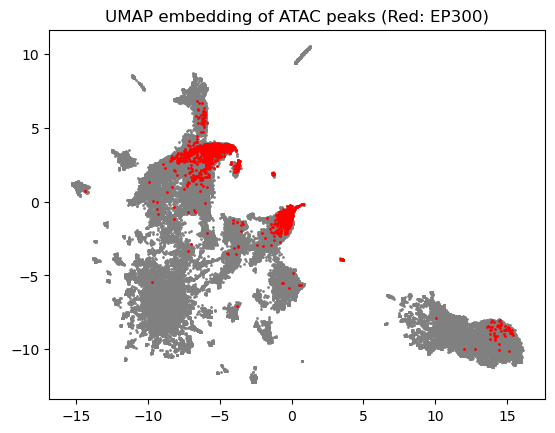

In [83]:
idx = np.where(target == "EP300")[0]
dat = dat_chipseq_tf_count

dat = dat.iloc[:, idx]
vec = dat.iloc[:, 0]
idx = vec > 1

plt.scatter(U[:,  0], U[:,  1], s=1, c="grey")
plt.scatter(U[idx,0], U[idx,1], s=1, c="red")
plt.title('UMAP embedding of ATAC peaks (Red: EP300)');

In [82]:
idx = target.str.contains("H3")
target[idx]

Index([], dtype='object', name='Label')